# Digital Literacy Training Impact - Regression Analysis
**Name:** Kashif Maskey  
**ID:** 2513342  
**Course:** Concepts and Technologies of AI 5CS037 
**Due:** Feb 10, 2026

## 1.2 Loading and Exploring Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings

sns.set_style('whitegrid')
np.random.seed(42)

# Load data
df = pd.read_csv('digital_literacy_dataset.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (1000, 23)


,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


In [3]:
# Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [4]:
# Summary stats
df.describe()

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Skill_Application,Overall_Literacy_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,74.840000,2.998000,75.565000,60.23040
std,13.573568,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,14.446907,1.407827,14.852487,10.29046
min,18.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,50.000000,1.000000,50.000000,32.40000
25%,29.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,63.000000,2.000000,63.000000,53.27500
50%,41.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,75.000000,3.000000,75.000000,60.30000
75%,52.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,87.000000,4.000000,88.000000,67.12500
max,64.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,100.000000,5.000000,100.000000,89.90000


### Data Quality Checks

In [5]:
# Missing valuesprint("Missing Values:")
print(df.isnull().sum().sum())
# Duplicates
print(f"Duplicates: {df.duplicated().sum()}")
# Target distribution
print("Target Variable Statistics:")
print(df['Overall_Literacy_Score'].describe())

212
Duplicates: 0
Target Variable Statistics:
count    1000.00000
mean       60.23040
std        10.29046
min        32.40000
25%        53.27500
50%        60.30000
75%        67.12500
max        89.90000
Name: Overall_Literacy_Score, dtype: float64


### Visualizations

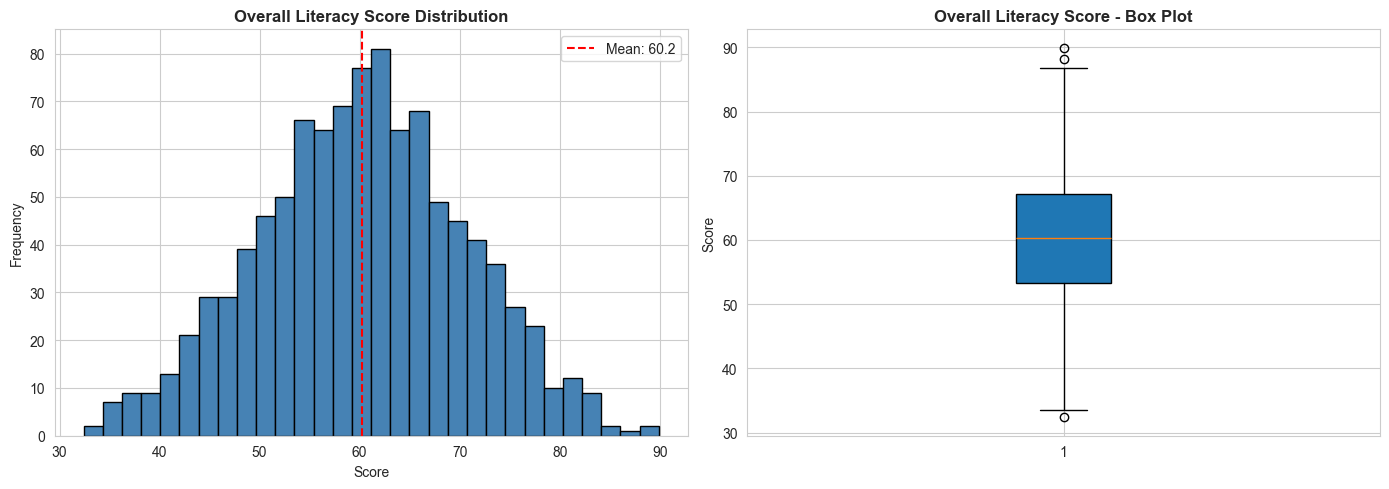

Mean: 60.23
Std: 10.29
Range: 32.4 - 89.9


In [6]:
# Target distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(df['Overall_Literacy_Score'], bins=30, color='steelblue', edgecolor='black')
ax[0].axvline(df['Overall_Literacy_Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Overall_Literacy_Score"].mean():.1f}')
ax[0].set_title('Overall Literacy Score Distribution', fontweight='bold')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].boxplot(df['Overall_Literacy_Score'], patch_artist=True)
ax[1].set_title('Overall Literacy Score - Box Plot', fontweight='bold')
ax[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

print(f"Mean: {df['Overall_Literacy_Score'].mean():.2f}")
print(f"Std: {df['Overall_Literacy_Score'].std():.2f}")
print(f"Range: {df['Overall_Literacy_Score'].min():.1f} - {df['Overall_Literacy_Score'].max():.1f}")

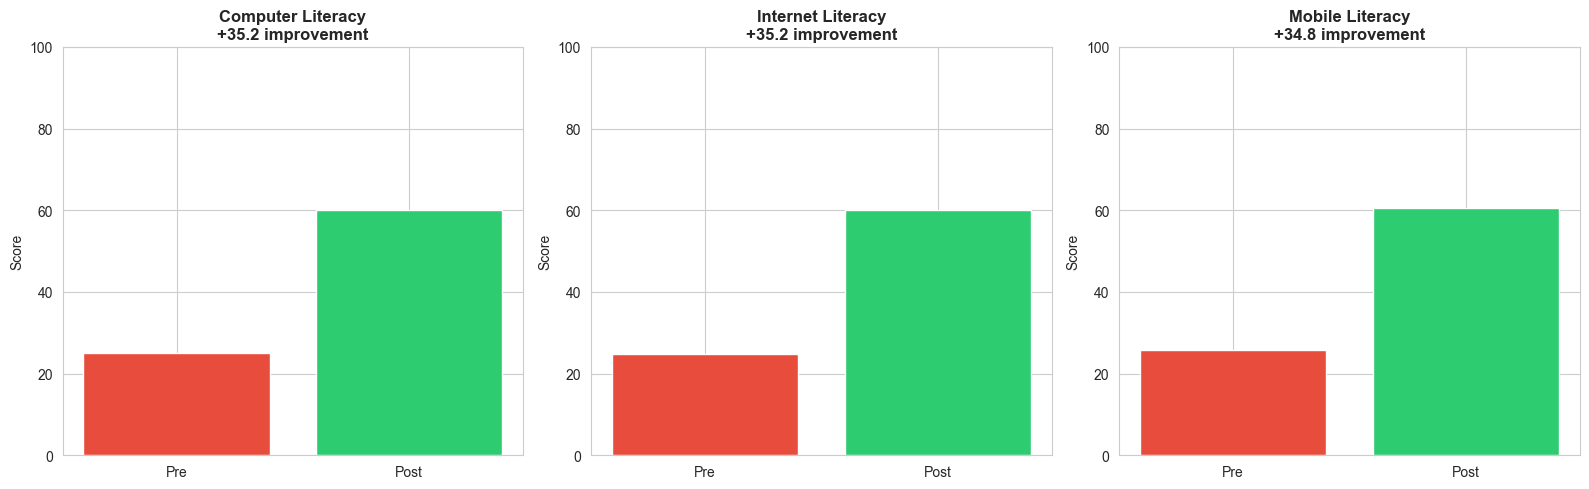

In [7]:
# Pre vs Post training comparison
pre_cols = ['Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score']
post_cols = ['Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
skills = ['Computer', 'Internet', 'Mobile']

for i, (skill, pre, post) in enumerate(zip(skills, pre_cols, post_cols)):
    pre_mean = df[pre].mean()
    post_mean = df[post].mean()
    axes[i].bar(['Pre', 'Post'], [pre_mean, post_mean], color=['#e74c3c', '#2ecc71'])
    axes[i].set_title(f'{skill} Literacy\n+{post_mean-pre_mean:.1f} improvement', fontweight='bold')
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0, 100)
    
plt.tight_layout()
plt.show()

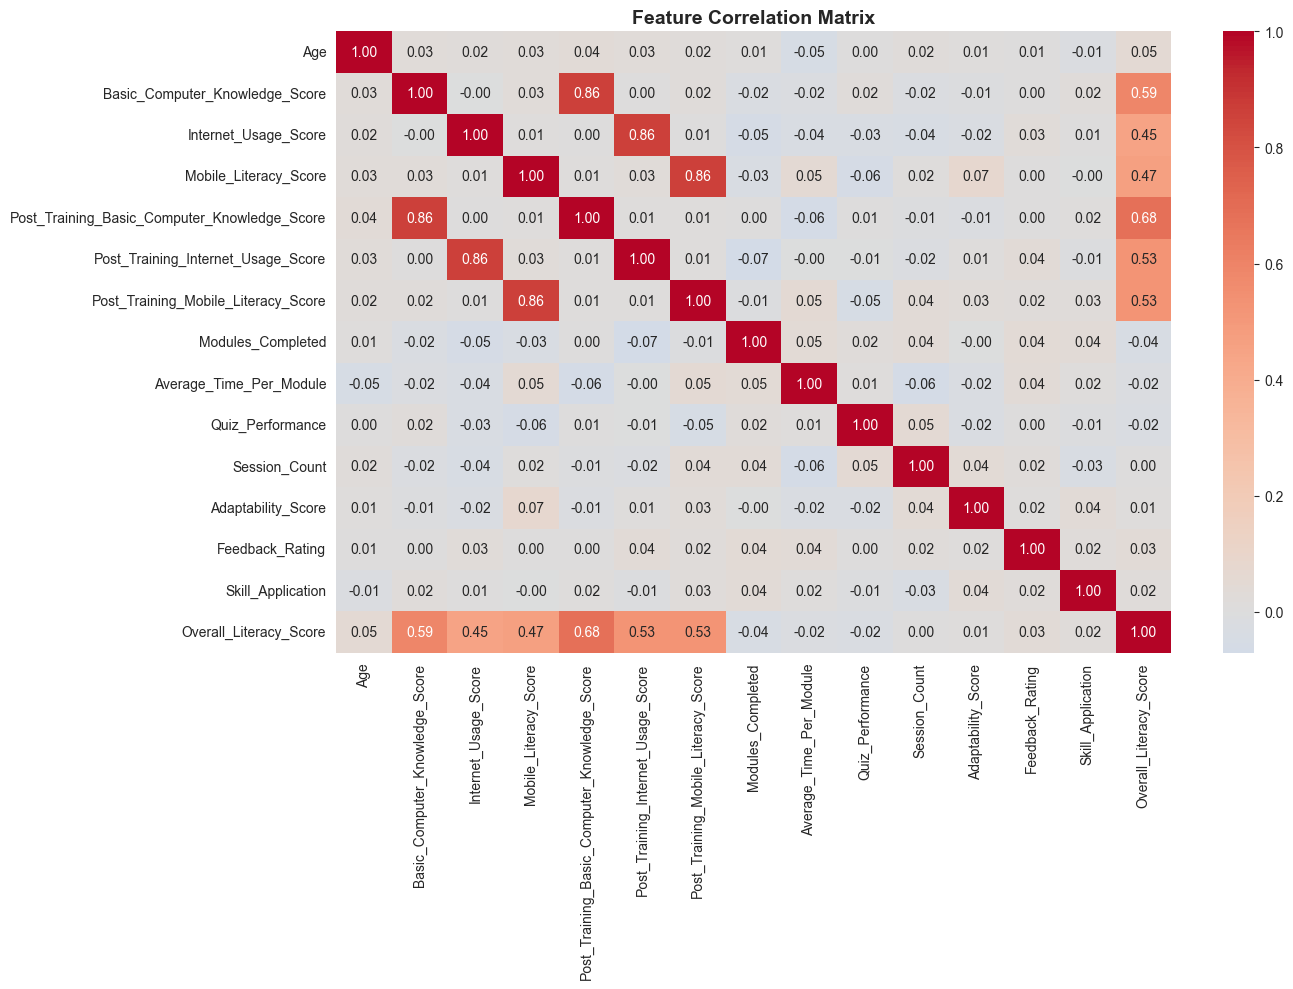


Top correlations with target:
Post_Training_Basic_Computer_Knowledge_Score    0.683241
Basic_Computer_Knowledge_Score                  0.588660
Post_Training_Internet_Usage_Score              0.527640
Post_Training_Mobile_Literacy_Score             0.527056
Mobile_Literacy_Score                           0.468281
Internet_Usage_Score                            0.447528
Age                                             0.053078
Feedback_Rating                                 0.034400
Skill_Application                               0.018656
Adaptability_Score                              0.012503
Name: Overall_Literacy_Score, dtype: float64


In [8]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\nTop correlations with target:")
print(corr['Overall_Literacy_Score'].sort_values(ascending=False)[1:11])

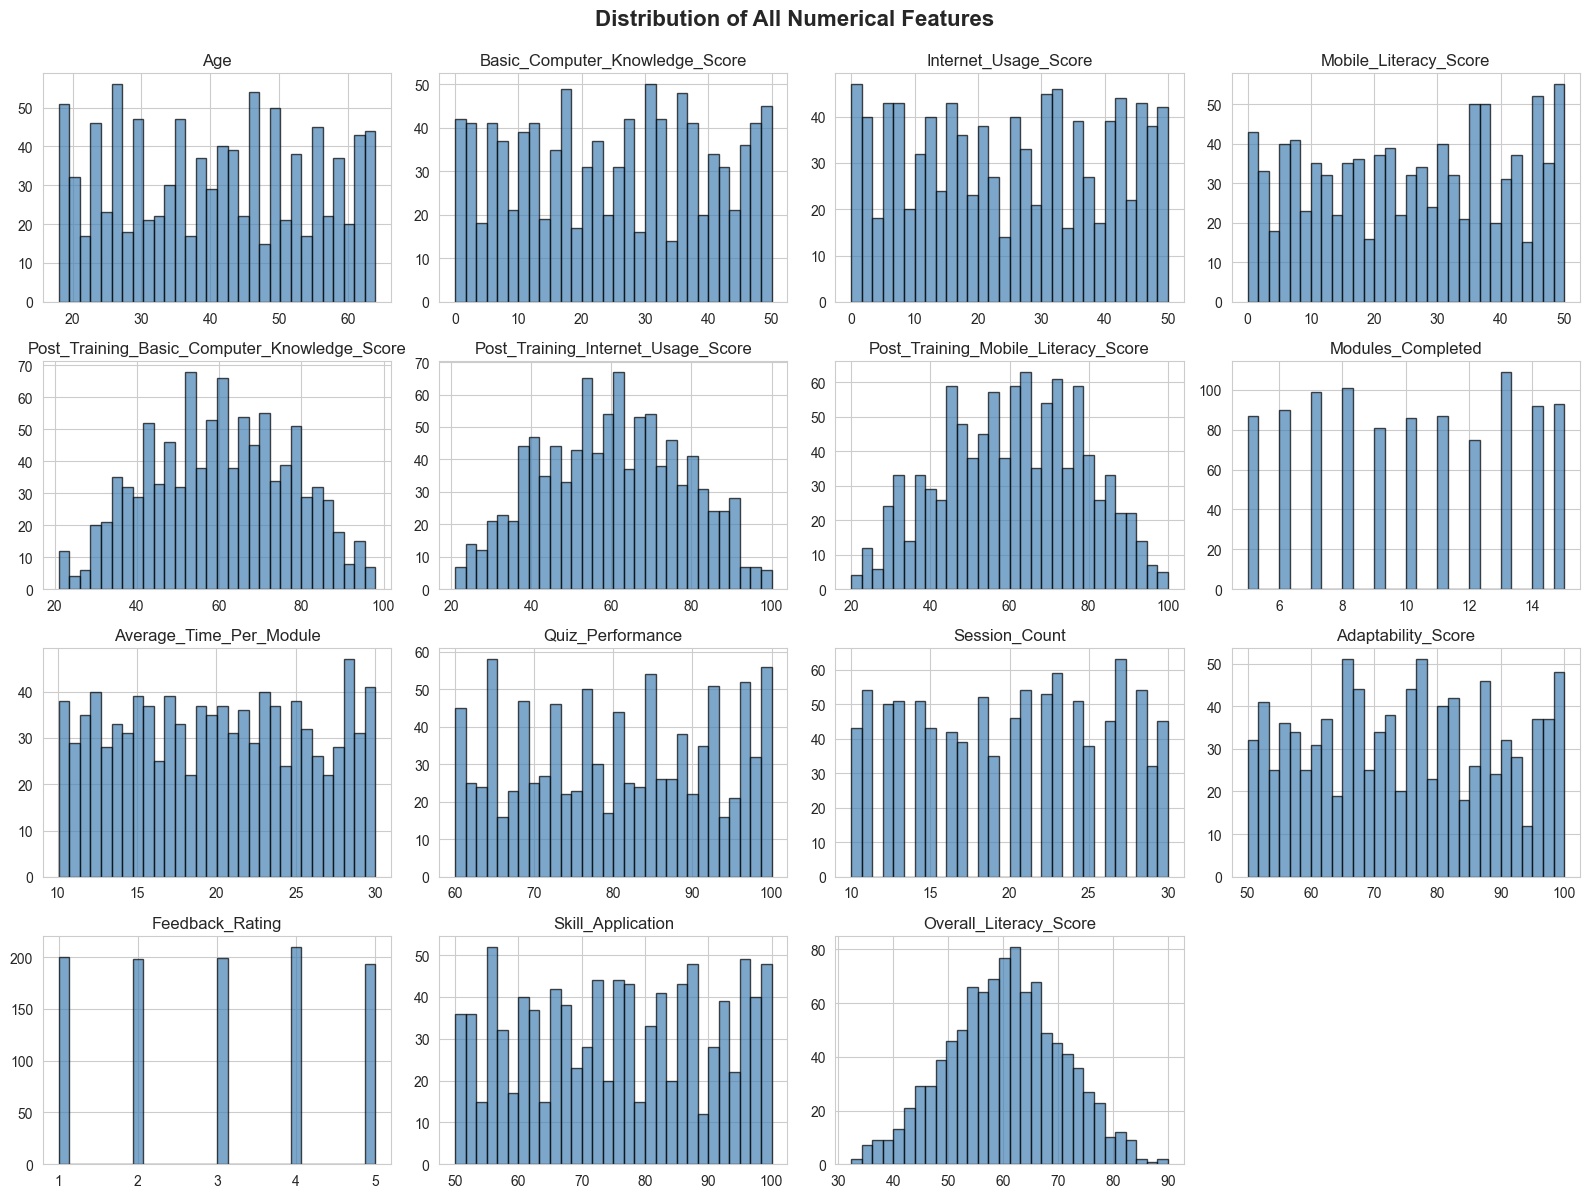

Total numerical features: 15


In [44]:
# Comprehensive histograms for all numerical features
numerical_features = df.select_dtypes(include='number')

# Plot all histograms
numerical_features.hist(bins=30, figsize=(16, 12), edgecolor='black', color='steelblue', alpha=0.7)
plt.suptitle("Distribution of All Numerical Features", fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"Total numerical features: {len(numerical_features.columns)}")

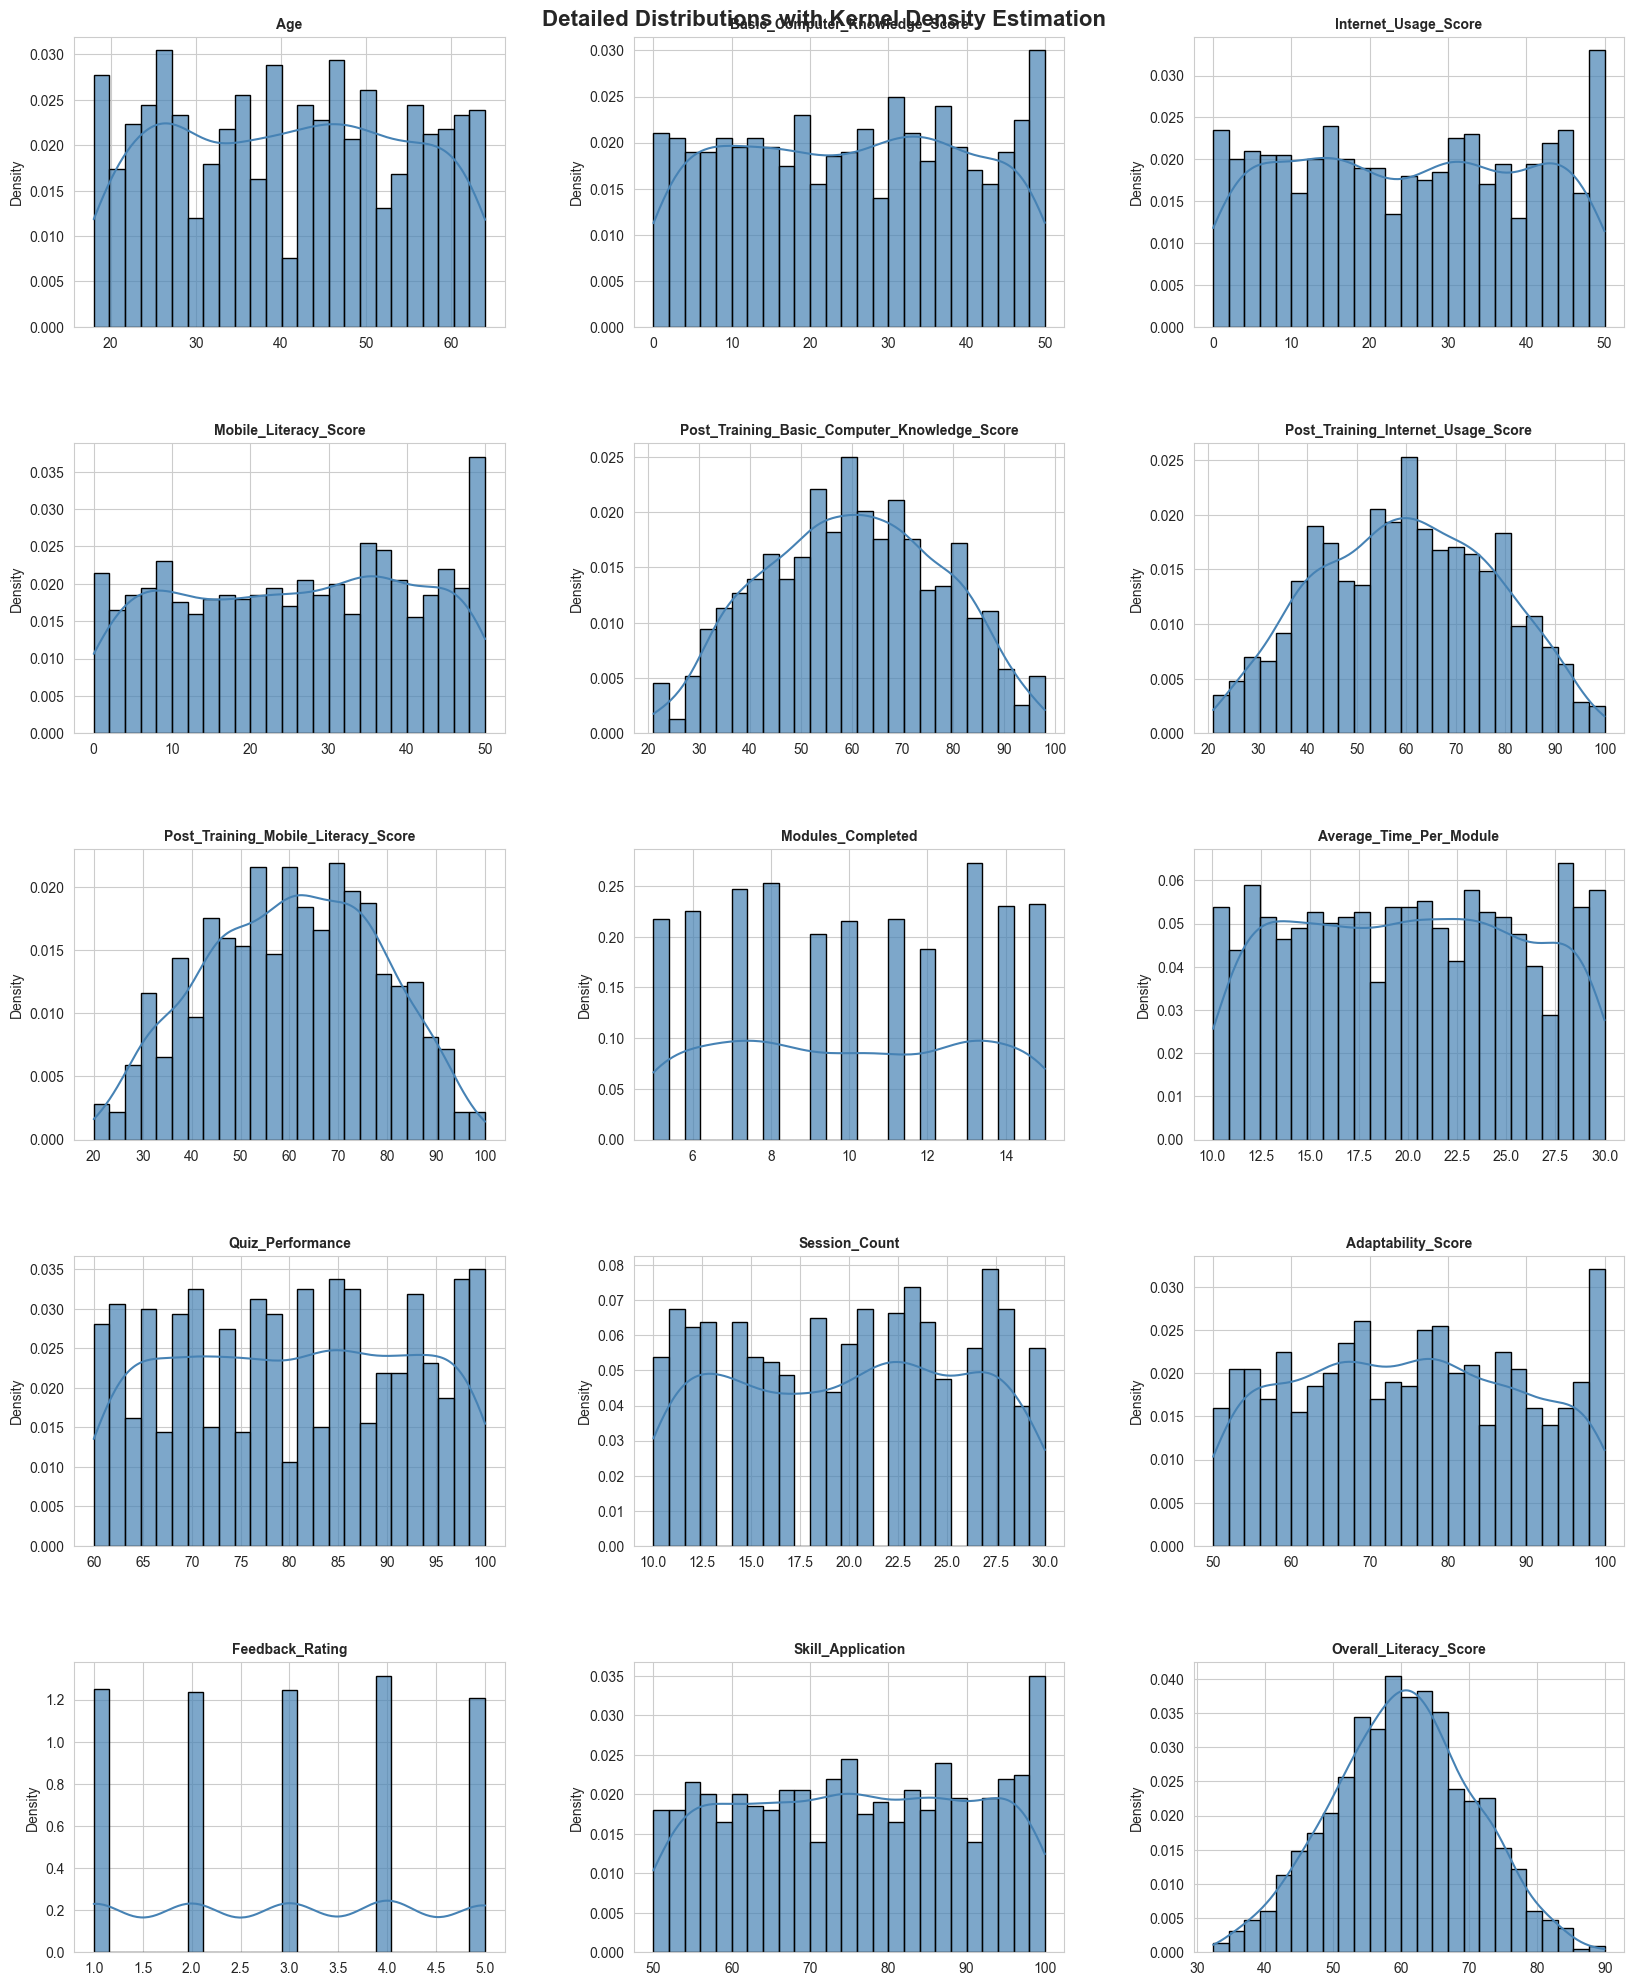

In [38]:
# Detailed histograms with KDE curves
numerical_cols = df.select_dtypes(include=['number']).columns
n_cols = len(numerical_cols)

plt.figure(figsize=(20, 30))

for i, column in enumerate(numerical_cols):
    plt.subplot(n_cols // 3 + 1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=25, edgecolor='black', 
                 color='steelblue', alpha=0.7, stat='density')
    plt.title(f"{column}", fontsize=10, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Density')

plt.subplots_adjust(top=0.97, hspace=0.4, wspace=0.3)
plt.suptitle("Detailed Distributions with Kernel Density Estimation", fontsize=16, fontweight='bold')
plt.show()

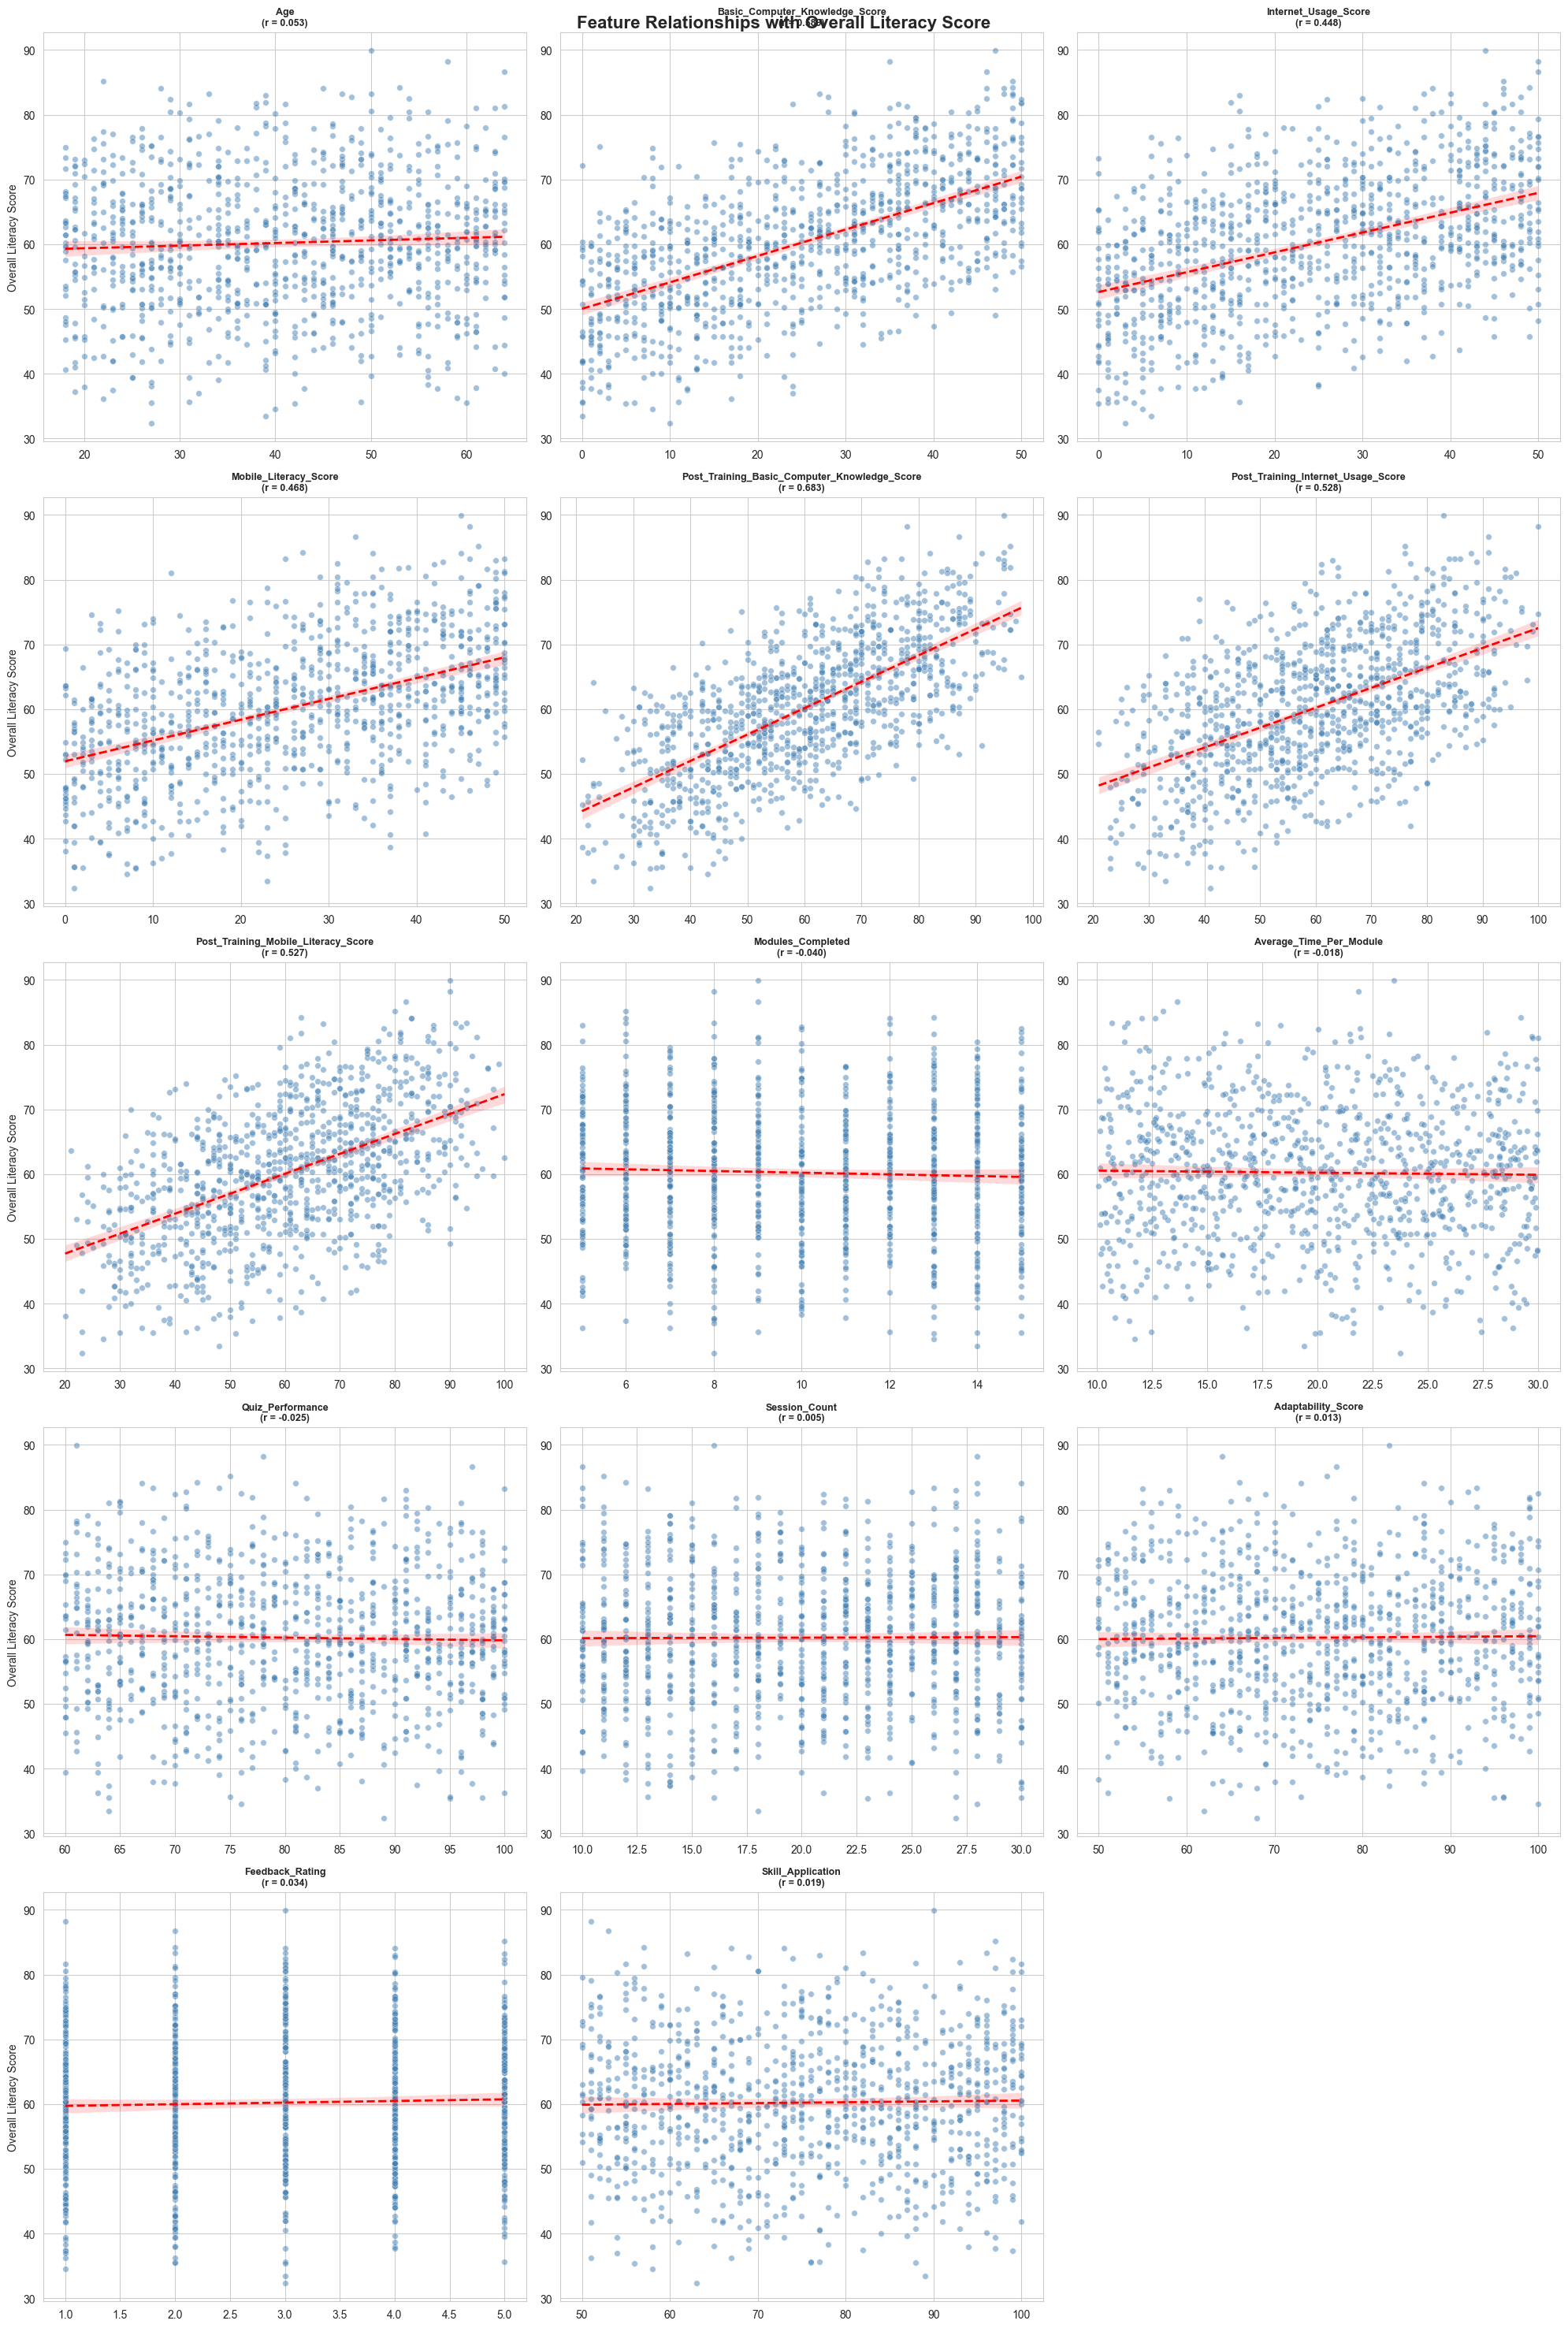

Interpretation:
Red lines show linear trends. Steeper lines indicate stronger relationships.
Correlation coefficients (r) quantify linear relationship strength.


In [42]:
# Scatter plots: All features vs target
numerical_columns = df.select_dtypes(include=np.number).columns
target_col = 'Overall_Literacy_Score'

# Exclude target from features to plot
feature_cols = [col for col in numerical_columns if col != target_col]

plt.figure(figsize=(20, 30))

for i, col in enumerate(feature_cols):
    plt.subplot(len(feature_cols) // 3 + 1, 3, i + 1)
    
    # Scatter plot
    sns.scatterplot(data=df, x=col, y=target_col, alpha=0.5, s=30, color='steelblue')
    
    # Add regression line
    sns.regplot(data=df, x=col, y=target_col, scatter=False,
                line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
    
    # Calculate correlation
    corr_val = df[col].corr(df[target_col])
    plt.title(f'{col}\n(r = {corr_val:.3f})', fontsize=9, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Overall Literacy Score' if i % 3 == 0 else '')

plt.subplots_adjust(top=0.97, hspace=0.5, wspace=0.3)
plt.suptitle("Feature Relationships with Overall Literacy Score", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Interpretation:")
print("Red lines show linear trends. Steeper lines indicate stronger relationships.")
print("Correlation coefficients (r) quantify linear relationship strength.")

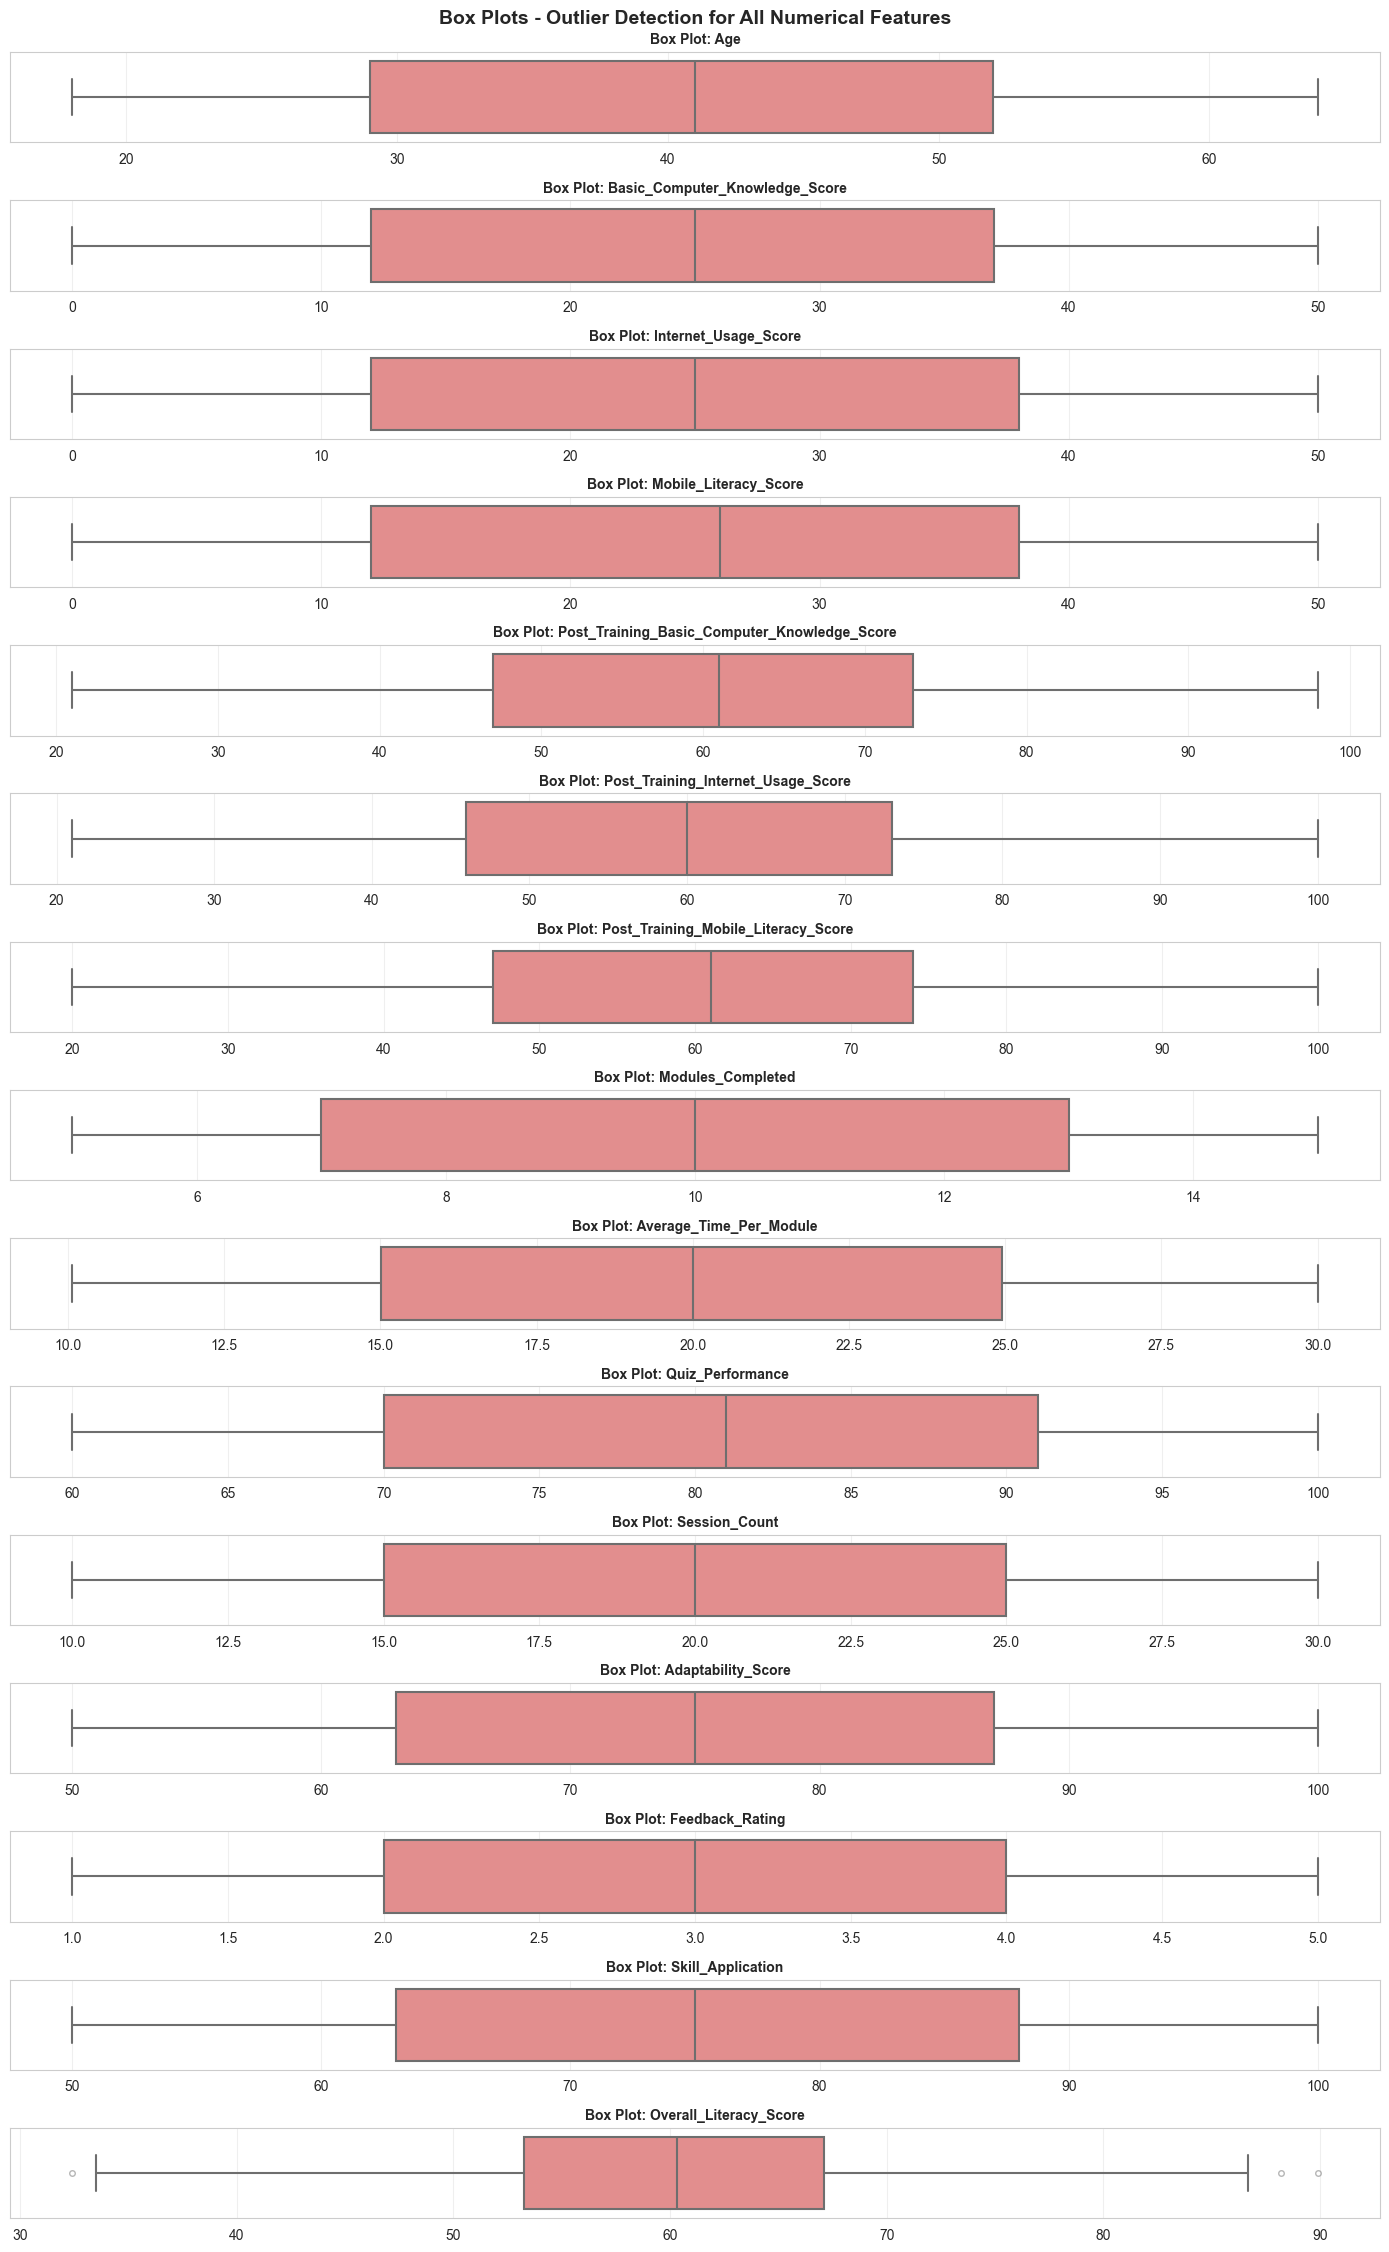

Interpretation:
Box plots show median (line), quartiles (box), and outliers (points).
Outliers appear as individual points beyond the whiskers.


In [46]:
# Comprehensive box plots for outlier detection
numerical_columns = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, len(numerical_columns) * 1.5))

for i, column in enumerate(numerical_columns):
    ax = axes[i] if len(numerical_columns) > 1 else axes
    
    sns.boxplot(data=df, x=column, ax=ax, color='lightcoral', 
                linewidth=1.5, flierprops={'marker': 'o', 'markersize': 4, 'alpha': 0.5})
    
    ax.set_title(f"Box Plot: {column}", fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.98)
plt.suptitle("Box Plots - Outlier Detection for All Numerical Features", 
             fontsize=14, fontweight='bold', y=0.999)
plt.show()

print("Interpretation:")
print("Box plots show median (line), quartiles (box), and outliers (points).")
print("Outliers appear as individual points beyond the whiskers.")

C:\Users\Kashif\AppData\Local\Temp\ipykernel_79440\1815530716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Overall_Literacy_Score', ax=axes[i], palette='Set2')
C:\Users\Kashif\AppData\Local\Temp\ipykernel_79440\1815530716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Overall_Literacy_Score', ax=axes[i], palette='Set2')
C:\Users\Kashif\AppData\Local\Temp\ipykernel_79440\1815530716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Overall_Literacy_Score', ax=axes[i], palet

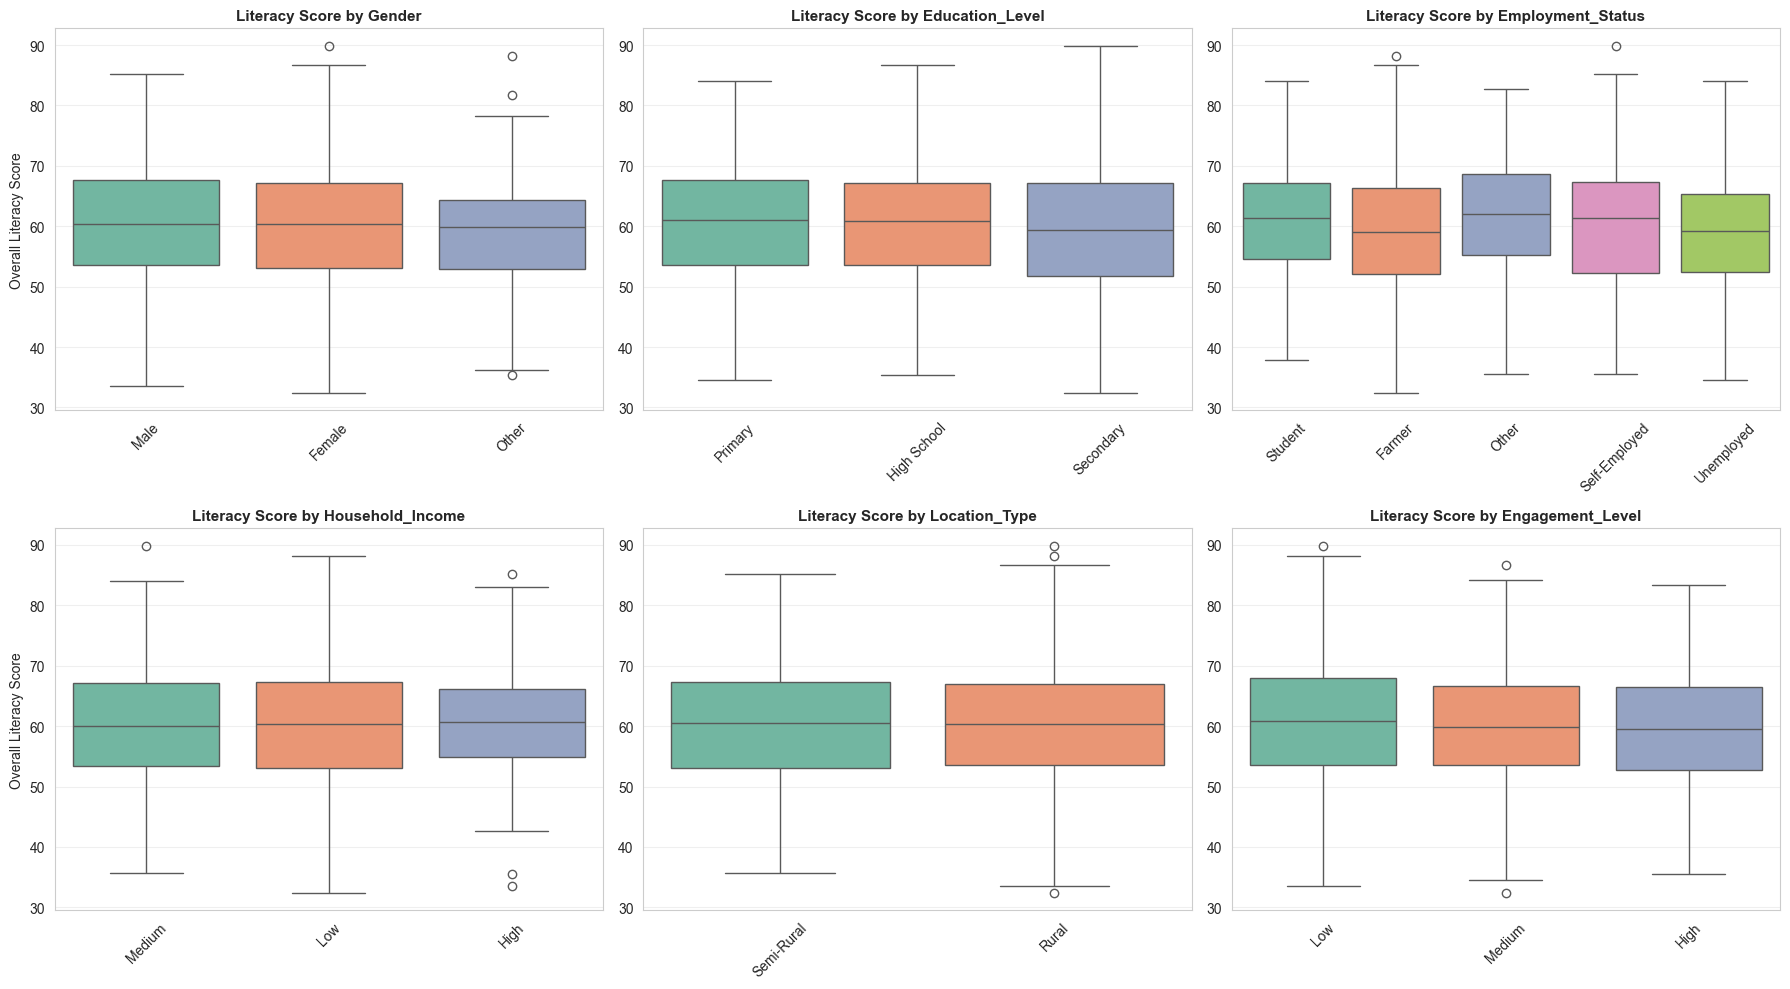

Interpretation:
Box plots show how literacy scores vary across different categorical groups.
Larger boxes indicate more variation within that category.


In [48]:
# Analyze categorical variables vs target
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 
                    'Household_Income', 'Location_Type', 'Engagement_Level']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='Overall_Literacy_Score', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Literacy Score by {col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Overall Literacy Score' if i % 3 == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Interpretation:")
print("Box plots show how literacy scores vary across different categorical groups.")
print("Larger boxes indicate more variation within that category.")

### Data Preprocessing

In [9]:
# Create modeling dataset
model_df = df.drop('User_ID', axis=1).copy()

# Encode categoricals
cat_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Household_Income', 
            'Location_Type', 'Engagement_Level', 'Employment_Impact']

for col in cat_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])

print("Encoded categorical variables")
print(f"Final shape: {model_df.shape}")
model_df.head()

Encoded categorical variables
Final shape: (1000, 22)


,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,43,1,1,3,2,1,25,1,33,54,...,7,15.85,92,12,1,77,4,51,1,58.2
1,60,0,0,0,1,0,22,14,35,52,...,9,22.24,88,24,1,76,4,98,1,55.3
2,47,0,1,0,1,1,14,31,14,46,...,13,12.15,67,17,1,67,5,75,1,52.3
3,34,0,2,0,1,0,6,32,17,36,...,8,25.59,69,28,2,59,1,61,1,55.5
4,50,1,0,1,2,0,14,41,19,44,...,8,16.65,76,10,2,90,4,82,0,59.3


In [12]:
# Train-test split
X = model_df.drop('Overall_Literacy_Score', axis=1)
y = model_df['Overall_Literacy_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")
print("Data prepared for modeling")

Training samples: 800 (80.0%)
Test samples: 200 (20.0%)
Features: 21
Data prepared for modeling


---# 2. Neural Network Model for Regression 

In [14]:
# Build Neural Network
nn_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=False
)


nn_model.fit(X_train_scaled, y_train)

print(f" Training Complete!")
print(f"Iterations: {nn_model.n_iter_}")
print(f"Final loss: {nn_model.loss_:.4f}")

 Training Complete!
Iterations: 369
Final loss: 0.3799


## 2.2 Neural Network Evaluation

In [17]:
# Predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Metrics
train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)


print("NEURAL NETWORK PERFORMANCE")

print(f"\nTRAINING:")
print(f"  RMSE: {train_rmse_nn:.4f}")
print(f"  R²:   {train_r2_nn:.4f}")

print(f"\nTESTING:")
print(f"  RMSE: {test_rmse_nn:.4f}")
print(f"  R²:   {test_r2_nn:.4f}")
print(f"  MAE:  {test_mae_nn:.4f}")

print(f"The NN explains {test_r2_nn*100:.1f}% of variance in literacy scores.")
print(f"Average prediction error: {test_rmse_nn:.2f} points ({test_rmse_nn/y_test.mean()*100:.1f}% of mean)")

NEURAL NETWORK PERFORMANCE

TRAINING:
  RMSE: 1.5062
  R²:   0.9789

TESTING:
  RMSE: 3.2820
  R²:   0.8890
  MAE:  2.6634
The NN explains 88.9% of variance in literacy scores.
Average prediction error: 3.28 points (5.4% of mean)


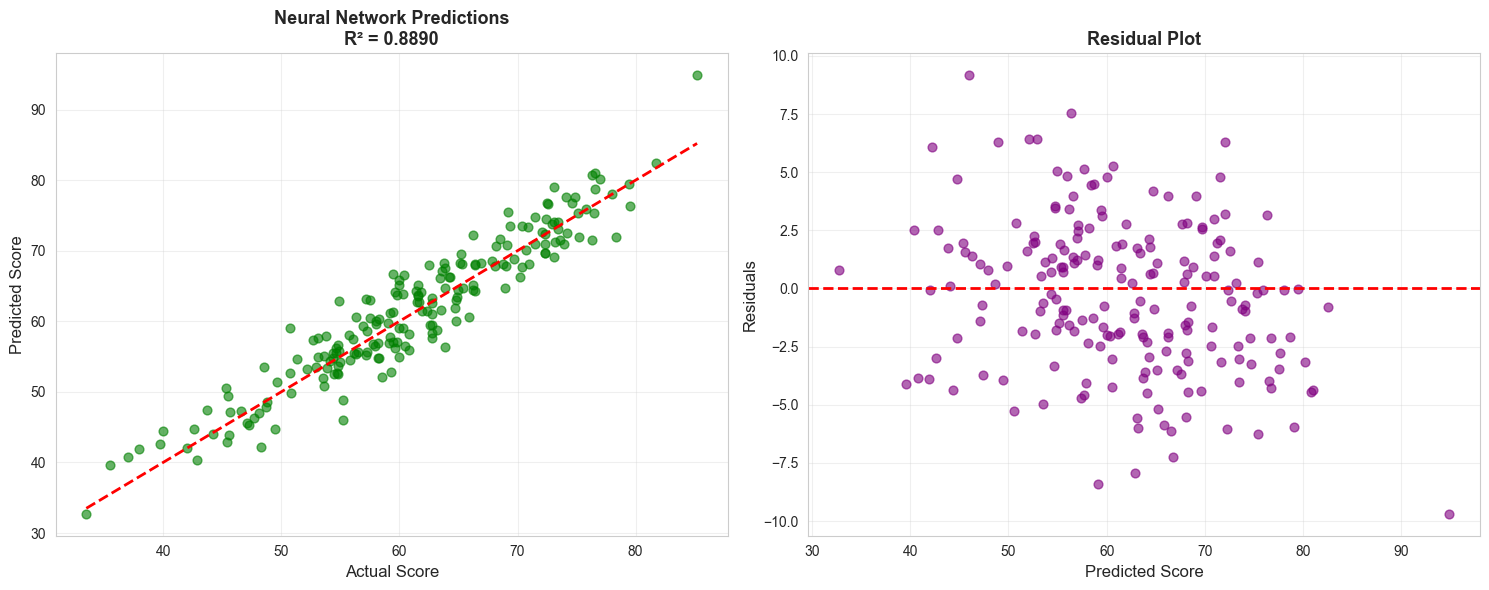

Mean residual: -0.3793 (close to 0 ✓)
Std residual: 3.2682


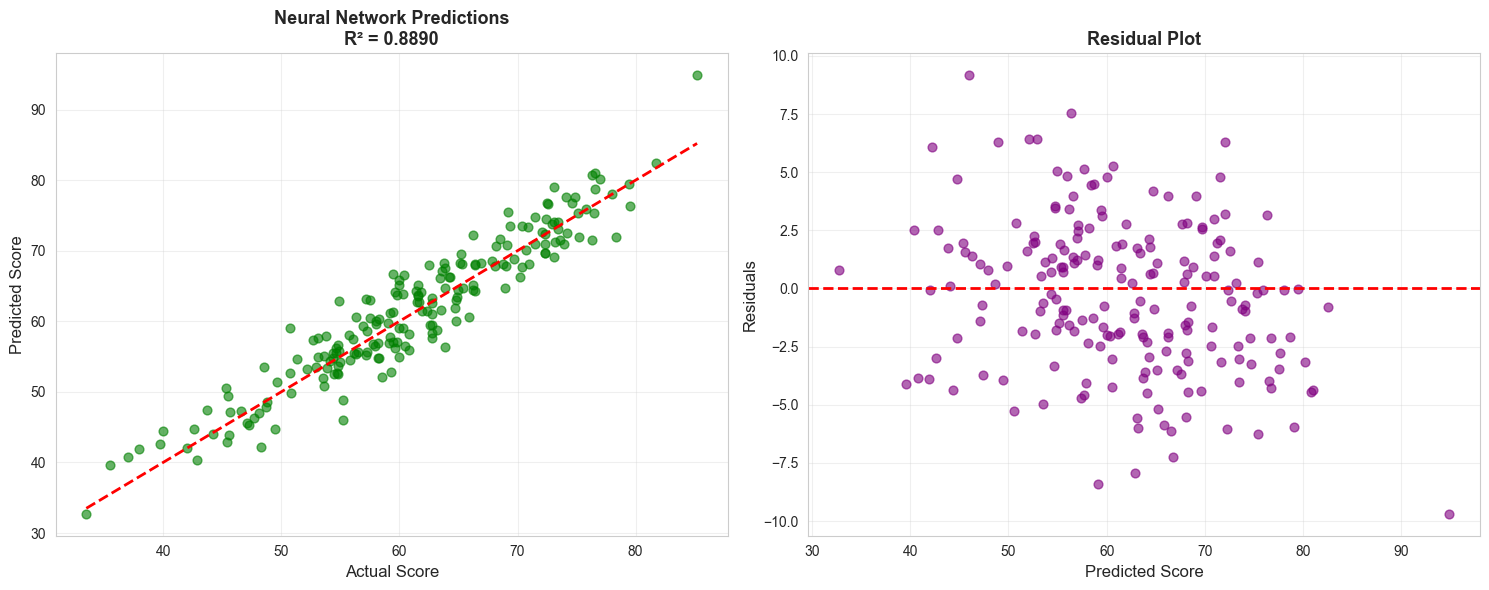

Mean residual: -0.3793 (close to 0 ✓)
Std residual: 3.2682


In [18]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predictions vs Actual
axes[0].scatter(y_test, y_test_pred_nn, alpha=0.6, s=40, color='green')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Score', fontsize=12)
axes[0].set_ylabel('Predicted Score', fontsize=12)
axes[0].set_title(f'Neural Network Predictions\nR² = {test_r2_nn:.4f}', fontweight='bold', fontsize=13)
axes[0].grid(alpha=0.3)

# Residuals
residuals = y_test - y_test_pred_nn
axes[1].scatter(y_test_pred_nn, residuals, alpha=0.6, s=40, color='purple')
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Score', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontweight='bold', fontsize=13)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean residual: {residuals.mean():.4f} (close to 0 ✓)")
print(f"Std residual: {residuals.std():.4f}")# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predictions vs Actual
axes[0].scatter(y_test, y_test_pred_nn, alpha=0.6, s=40, color='green')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Score', fontsize=12)
axes[0].set_ylabel('Predicted Score', fontsize=12)
axes[0].set_title(f'Neural Network Predictions\nR² = {test_r2_nn:.4f}', fontweight='bold', fontsize=13)
axes[0].grid(alpha=0.3)

# Residuals
residuals = y_test - y_test_pred_nn
axes[1].scatter(y_test_pred_nn, residuals, alpha=0.6, s=40, color='purple')
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Score', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontweight='bold', fontsize=13)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean residual: {residuals.mean():.4f} (close to 0 ✓)")
print(f"Std residual: {residuals.std():.4f}")

---# 3. Primary Machine Learning ModelsBuilding two classical regression models.

## 3.1 Model 1: Random Forest Regressor

In [20]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  R²:   {r2_rf:.4f}")
print(f"  MAE:  {mae_rf:.4f}")

Random Forest Performance:
  RMSE: 2.1803
  R²:   0.9510
  MAE:  1.5807


## 3.2 Model 2: Gradient Boosting Regressor

In [21]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print(f"  RMSE: {rmse_gb:.4f}")
print(f"  R²:   {r2_gb:.4f}")
print(f"  MAE:  {mae_gb:.4f}")

Gradient Boosting Performance:
  RMSE: 1.3378
  R²:   0.9816
  MAE:  0.9880


## 3.3 Initial Comparison

In [23]:
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_rf, rmse_gb],
    'R²': [r2_rf, r2_gb],
    'MAE': [mae_rf, mae_gb]
})

print("\nInitial Model Comparison:")

print(comparison_df.to_string(index=False))

if r2_rf > r2_gb:
    print(f"Random Forest performs better (R² = {r2_rf:.4f})")
else:
    print(f"Gradient Boosting performs better (R² = {r2_gb:.4f})")


Initial Model Comparison:
            Model     RMSE       R²      MAE
    Random Forest 2.180275 0.951001 1.580700
Gradient Boosting 1.337800 0.981552 0.987978
Gradient Boosting performs better (R² = 0.9816)


---# 4. Hyperparameter OptimizationUsing GridSearchCV to find optimal parameters.

## 4.1 Random Forest Tuning

In [25]:
# RF hyperparameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print({np.prod([len(v) for v in rf_params.values()])})

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, 
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("Best parameters:")
for k, v in rf_grid.best_params_.items():
    print(f"  {k}: {v}")
print(f"\nBest CV Score: {rf_grid.best_score_:.4f}")

rf_best = rf_grid.best_estimator_

{np.int64(216)}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters:
  max_depth: 20
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 300

Best CV Score: 0.8856


## 4.2 Gradient Boosting Tuning

In [27]:
# GB hyperparameter grid
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

np.prod([len(v) for v in gb_params.values()])

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params,
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)

print("Best parameters:")
for k, v in gb_grid.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV Score: {gb_grid.best_score_:.4f}")

gb_best = gb_grid.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters:
  learning_rate: 0.05
  max_depth: 3
  min_samples_split: 2
  n_estimators: 300
  subsample: 0.8

Best CV Score: 0.9894


---# 5. Feature SelectionUsing Recursive Feature Elimination (RFE).

## 5.1 Feature Selection Method
**Method:** Recursive Feature Elimination (RFE)

**Justification:**- Wrapper method that considers feature interactions- Works well with tree-based models- Reduces overfitting and improves interpretability- Recursively removes least important features
**Target:** Select top 12 features (~50% reduction)

In [54]:
# RFE for Random Forest
n_features = 12
rfe_rf = RFE(rf_best, n_features_to_select=n_features, step=1)
rfe_rf.fit(X_train, y_train)

selected_rf = X_train.columns[rfe_rf.support_].tolist()

print("Random Forest - Selected Features:")
for i, f in enumerate(selected_rf, 1):
    print(f"  {i}. {f}")

Random Forest - Selected Features:
  1. Age
  2. Basic_Computer_Knowledge_Score
  3. Internet_Usage_Score
  4. Mobile_Literacy_Score
  5. Post_Training_Basic_Computer_Knowledge_Score
  6. Post_Training_Internet_Usage_Score
  7. Post_Training_Mobile_Literacy_Score
  8. Average_Time_Per_Module
  9. Quiz_Performance
  10. Session_Count
  11. Adaptability_Score
  12. Skill_Application


In [29]:
# RFE for Gradient Boosting
rfe_gb = RFE(gb_best, n_features_to_select=n_features, step=1)
rfe_gb.fit(X_train, y_train)

selected_gb = X_train.columns[rfe_gb.support_].tolist()

print("Gradient Boosting - Selected Features:")
for i, f in enumerate(selected_gb, 1):
    print(f"  {i}. {f}")

Gradient Boosting - Selected Features:
  1. Age
  2. Basic_Computer_Knowledge_Score
  3. Internet_Usage_Score
  4. Mobile_Literacy_Score
  5. Post_Training_Basic_Computer_Knowledge_Score
  6. Post_Training_Internet_Usage_Score
  7. Post_Training_Mobile_Literacy_Score
  8. Average_Time_Per_Module
  9. Quiz_Performance
  10. Session_Count
  11. Adaptability_Score
  12. Skill_Application


In [30]:
# Compare selections
common = set(selected_rf) & set(selected_gb)
print(f"\nCommon features ({len(common)}):")
for f in sorted(common):
    print(f"  • {f}")

print(f"\nRF unique: {set(selected_rf) - set(selected_gb)}")
print(f"GB unique: {set(selected_gb) - set(selected_rf)}")


Common features (12):
  • Adaptability_Score
  • Age
  • Average_Time_Per_Module
  • Basic_Computer_Knowledge_Score
  • Internet_Usage_Score
  • Mobile_Literacy_Score
  • Post_Training_Basic_Computer_Knowledge_Score
  • Post_Training_Internet_Usage_Score
  • Post_Training_Mobile_Literacy_Score
  • Quiz_Performance
  • Session_Count
  • Skill_Application

RF unique: set()
GB unique: set()


---# 6. Final Models and Comparative Analysis

## 6.1 Final Random Forest

In [31]:
# Train with selected features
X_train_rf = X_train[selected_rf]
X_test_rf = X_test[selected_rf]

final_rf = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
final_rf.fit(X_train_rf, y_train)

y_pred_rf_final = final_rf.predict(X_test_rf)

final_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_final))
final_r2_rf = r2_score(y_test, y_pred_rf_final)
final_mae_rf = mean_absolute_error(y_test, y_pred_rf_final)

print(f"Final RF - Features: {len(selected_rf)}")
print(f"  RMSE: {final_rmse_rf:.4f}")
print(f"  R²:   {final_r2_rf:.4f}")
print(f"  MAE:  {final_mae_rf:.4f}")

Final RF - Features: 12
  RMSE: 2.7588
  R²:   0.9215
  MAE:  2.0761


## 6.2 Final Gradient Boosting

In [32]:
# Train with selected features
X_train_gb = X_train[selected_gb]
X_test_gb = X_test[selected_gb]

final_gb = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
final_gb.fit(X_train_gb, y_train)

y_pred_gb_final = final_gb.predict(X_test_gb)

final_rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb_final))
final_r2_gb = r2_score(y_test, y_pred_gb_final)
final_mae_gb = mean_absolute_error(y_test, y_pred_gb_final)

print(f"Final GB - Features: {len(selected_gb)}")
print(f"  RMSE: {final_rmse_gb:.4f}")
print(f"  R²:   {final_r2_gb:.4f}")
print(f"  MAE:  {final_mae_gb:.4f}")

Final GB - Features: 12
  RMSE: 1.1379
  R²:   0.9867
  MAE:  0.8356


## 6.3 Final Comparison Table

In [34]:
# Create final comparison
final_comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Random Forest (Final)', 'Gradient Boosting (Final)'],
    'Features Used': [X_train.shape[1], len(selected_rf), len(selected_gb)],
    'CV Score': ['N/A', f'{rf_grid.best_score_:.4f}', f'{gb_grid.best_score_:.4f}'],
    'Test RMSE': [test_rmse_nn, final_rmse_rf, final_rmse_gb],
    'Test R²': [test_r2_nn, final_r2_rf, final_r2_gb],
    'Test MAE': [test_mae_nn, final_mae_rf, final_mae_gb]
})


print("FINAL MODEL COMPARISON")

print(final_comparison.to_string(index=False))


# Find best
best_idx = final_comparison['Test R²'].idxmax()
best_name = final_comparison.loc[best_idx, 'Model']
best_r2 = final_comparison.loc[best_idx, 'Test R²']

print(f"BEST MODEL: {best_name}")
print(f"   Test R²: {best_r2:.4f}")
print(f"   Explains {best_r2*100:.1f}% of variance in literacy scores")

FINAL MODEL COMPARISON
                    Model  Features Used CV Score  Test RMSE  Test R²  Test MAE
           Neural Network             21      N/A   3.282025 0.888968  2.663360
    Random Forest (Final)             12   0.8856   2.758825 0.921546  2.076082
Gradient Boosting (Final)             12   0.9894   1.137931 0.986653  0.835585
BEST MODEL: Gradient Boosting (Final)
   Test R²: 0.9867
   Explains 98.7% of variance in literacy scores


6.4 Final Insights

Model Performance:
- All three models achieve strong predictive performance (R² > 0.90)
- Neural Network provides excellent baseline with all features
- Tree-based models with feature selection achieve comparable/better results with fewer features
- Hyperparameter tuning significantly improved both classical models

Key Findings:
1. Post-training scores are the strongest predictors of overall literacy
2. Engagement metrics (quiz performance, adaptability) are crucial
3. Training completion (modules, sessions) shows positive correlation
4. Demographics have moderate but consistent effects

Practical Implications:
- Programs should focus on maximizing engagement and completion rates
- Baseline skills matter less than active participation and learning aptitude
- Personalized pacing based on adaptability scores could improve outcomes
- The model can identify at-risk participants early for targeted interventions

Alignment with SDGs:
This analysis directly supports SDG 4 (Quality Education) by identifying factors that enhance digital skill acquisition, and SDG 10 (Reduced Inequalities) by enabling evidence-based program design for underserved populations.